# Layouts e componenetes básicos no Jetpack Componse

O Jetpack Compose tornou a atividade de criação UI um trabalho extremamente fácil e produtivo.

Um dos fundamentos que possibilitam isso são o sistema de Layouts do Jetpack Compose, onde fornecem vários elementos de layout que você pode usar para criar UIs interessantes e intuitivas.

Caso tentemos passar dois textos, sem as orientações necessárias ambos irão se sobrepor, exemplo:

In [ ]:
@Composable
fun BoxScreen() {
    Text(text = "FIAP")
    Text(text = "ON")
}

Resultado:

<center>

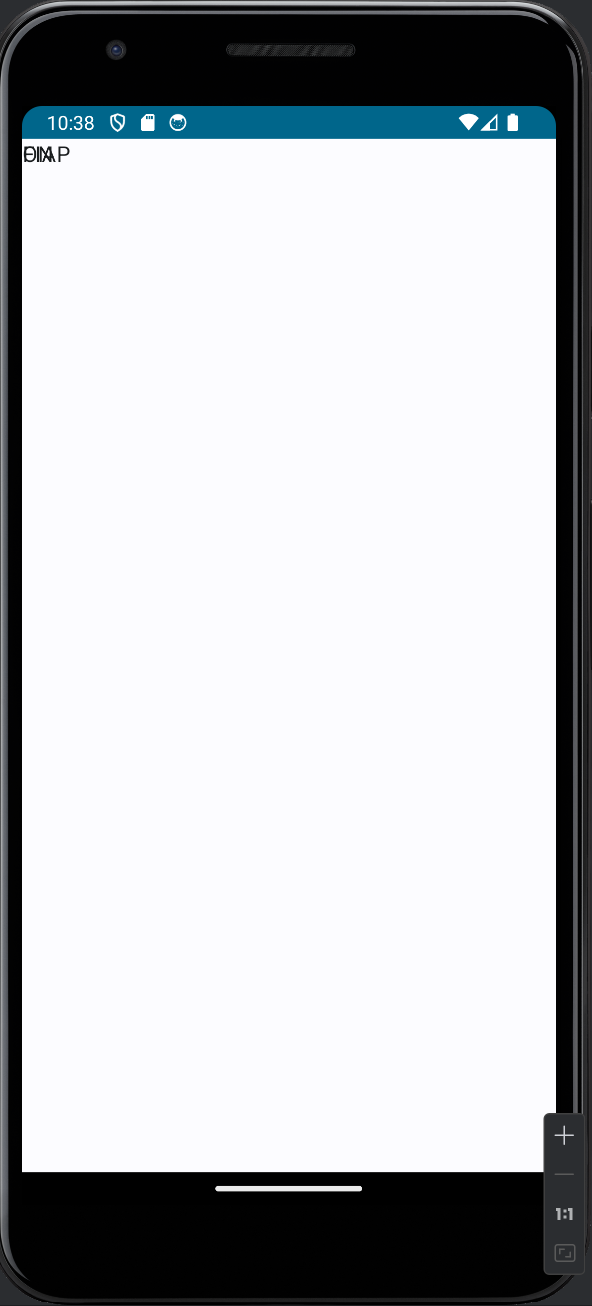

</center>

Para sanar isto, ja aprendemos no capítulo anterior que podemos usar o "Column" e "Row". Mas além disso vamos apredner um pouco mais sobre outros elementos de layout que tornarão o UI muito mais profissional.

## Box e Surface

Box é usado para agrupar outros composables, como textos e botões dentro de uma área retangular.

Podemos comparar o Box a uma DIV no HTML, ou seja, é um container de composables, mas que sabe como posicioná-los de acordo com a orientação dada.

O compose Box, possui um parâmetro "contentAlignment", que nos permite alinhar o conteúdo em qualquer lado do Box. Portanto, vamos acrescentar esse parâmetros ao Box e ver o resultado:

In [ ]:
@Composable
fun BoxScreen() {
  Box(contentAlignment = Alignment.Center) {
    Text(text = "FIAP")
  }
}

O resultado foi:

<center>

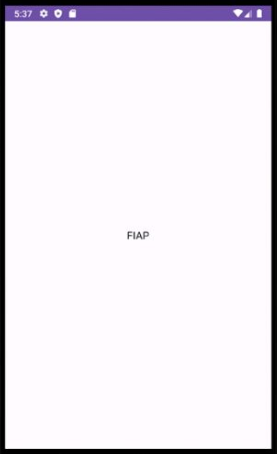

</center>

Agora vamos alterar o contentAlignment para "Alignment.TopEnd" e ver o resultado:

<center>

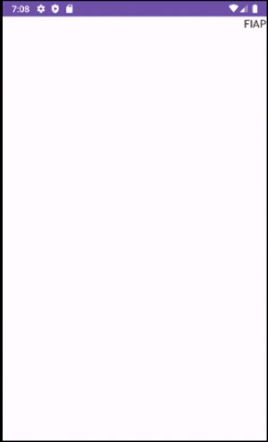

</center>

Como podemos ver, o parâmetro "contentAlignment" permite alinhar o contéudo em qualquer um dos lado da "Box". Mas e se tivermos outro componente?

Vamos testar: Adicionar um botão á nossa BOx e observar o resultado:

In [ ]:
@Composable
fun BoxScreen() {
  Box(contentAlignment = Alignment.TopEnd) {
    Text(text = "FIAP")
    Button(onClick = { /*TODO*/ }) {
      Text(text = "Clique aqui")
    }
  }
}

Ao executar a aplicação, notamos que nosso texto sumiu!...

<center>

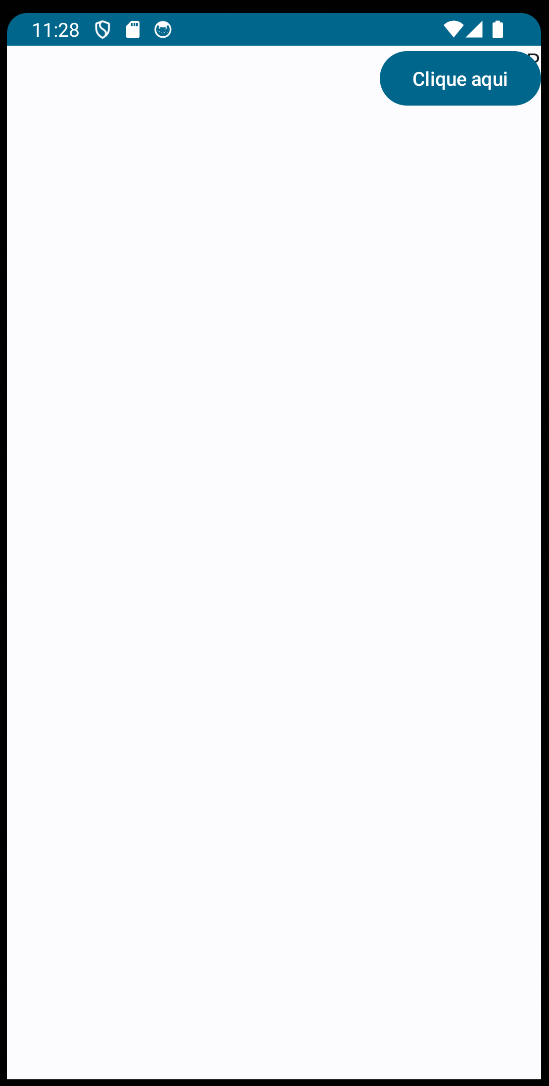

</center>

Na verdade ele não sumiu, apenas esta empilhado no interior da box, ou seja, o ultimo elemento inserido fica na ultima camada, e o primeiro elemento inserido fica na primeira camada (sendo sobreposto pelo ultimo)



## Alinhando vários componenetes na mesma BOX

Aprendemos que podemos alinahr conteúdos de uma Box utilizando o parâmetro "contentAlignment", mas todos os componenetes dentro da Box serão alinhados no mesmo lugar! e não queremos isso!

Para isso usaremos um parametros dos próprios compsables filhos (Box é o pai e os composables dentro dele são filhos), este parâmetro se chama <b>modifier</b>, com este parâmetro podemos alterar diversar características do componenete, inclusive a sua posição dentro da Box

Por tanto! faremos isso usando o modifier em conjunto com o align(do pacote androidx.compose.foundation.layout.BoxScope) da seguinte maneira:

In [ ]:
@Composable
fun BoxScreen() {
  Box(contentAlignment = Alignment.TopEnd) {
    Button(
      onClick = { /*TODO*/ },
      modifier = Modifier.align(Alignment.BottomEnd)
    ) {
      Text(text = "Clique aqui")
    }
    Text(
      text = "FIAP",
      modifier = Modifier.align(Alignment.TopStart)
    )
  }
}

Executando o emulador, vimos que o modifier dos filhos, foram ouvidos, mesmo que o pai box, tenha dito algo diferente, isso porque o parâmetro modifier dos filhos têm vontade própria, assim como os filhos na vida real! rs

## Controle de posicionamento com "OFFSET"

- Também é possivel movimentar os componentes dentro do box, usando as <b style="color:crimson">coordenadas x e y (Ambos começando em x0 (esquerda total) e y0(topo total))</b>

- Podemos também usar coordenadas negativas, porém é recomendado passar estar coordenadas dentro de parenteses : <i style="color:gray">y = (-90).dp</i>

- Esta não a forma mais eficiente, mas ás vezes é necessária

- Na figura abaixo temos o botão posicionado nas coordenadas x=30.dp e y=40.dp e o seu modificador de alinhamento como "TopStart" dentro da box:

<center>

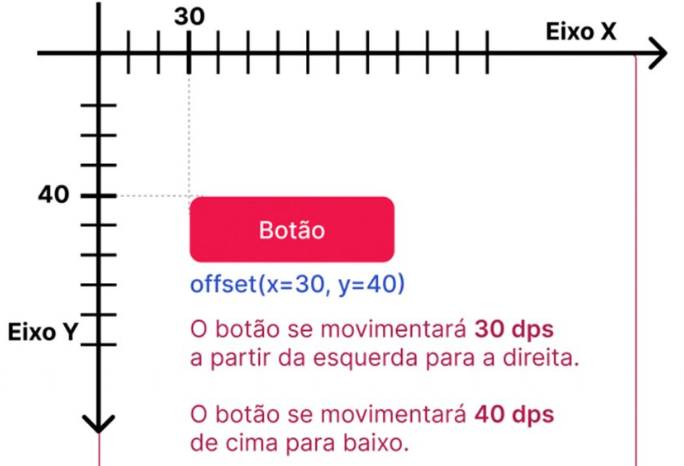

</center>

Um outro exemplo disto e o deslocamento dos botões e texto do compose seguinte:

In [ ]:
@Composable
fun BoxScreen() {
    Box(contentAlignment = Alignment.TopEnd) {
        Button(
            onClick = { /*TODO*/ },

           // Alinhamento no top e começo (esquerda)
            modifier = Modifier.align(Alignment.TopStart)
        ) {
            Text(text = "Clique aqui")
        }
        Text(
            text = "FIAP",
            // Alinhamento no centro
            modifier = Modifier.align(Alignment.Center)

        )
        Button(
            onClick = { /*TODO*/ },
            modifier = Modifier
            // Alinhamento no bottom e fim (direita))
                .align(Alignment.BottomEnd)
                // com o deslocamento de 20 x e 10 y
                .offset(x = 20.dp, y = 10.dp)
        ) {
            Text(text = "Other Button")
        }
    }
}


E o resultado é:

<center>

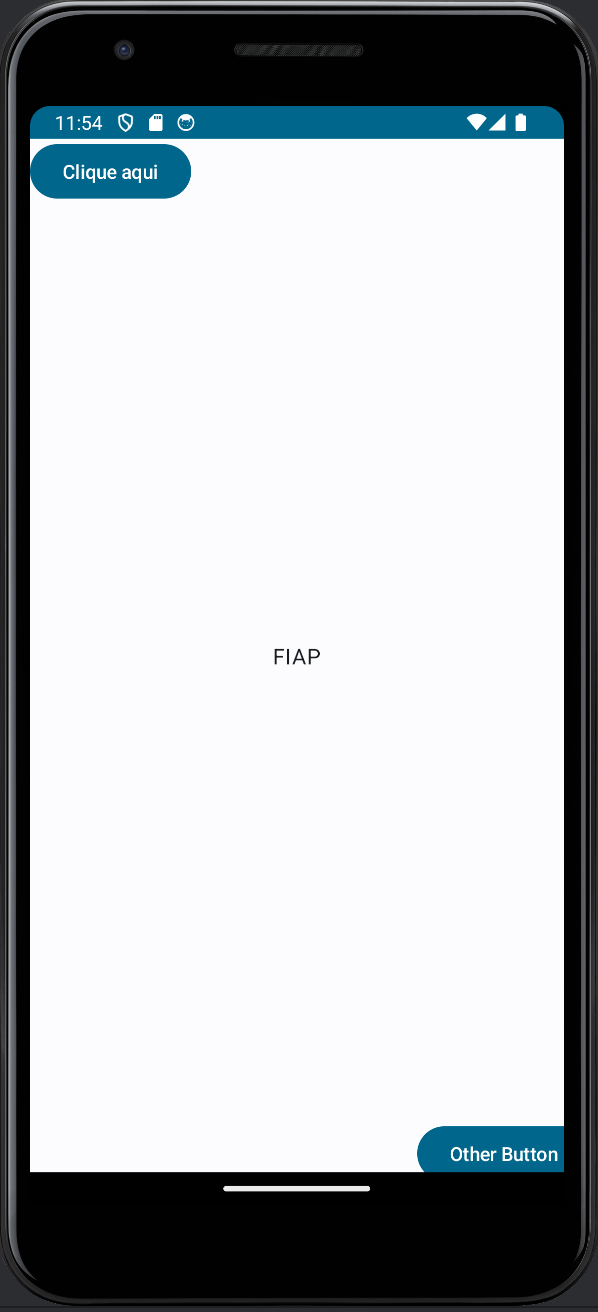

</center>

## Column e Row

São os composables de layout mais utilizados!

Pois permitem que posicionemos os componenetes de nossa UI lado a lado, na horizontal ou na vertical, na ordem em que são inseridos em nosso código.

Agora vamos criar a seguinte imagem, usando Column e Rows:

<center>

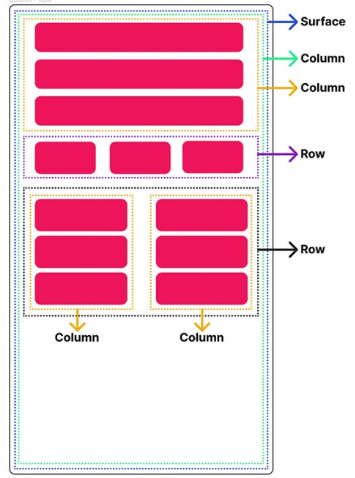

</center>

Sabendo disso podemos criar, column e dentro dela rows, e dentro de rows columns e vice versa:

In [ ]:
package br.com.fiap.columnrow

import android.os.Bundle
import androidx.activity.ComponentActivity
import androidx.activity.compose.setContent
import androidx.compose.foundation.background
import androidx.compose.foundation.layout.Arrangement
import androidx.compose.foundation.layout.Column
import androidx.compose.foundation.layout.Row
import androidx.compose.foundation.layout.fillMaxHeight
import androidx.compose.foundation.layout.fillMaxSize
import androidx.compose.foundation.layout.fillMaxWidth
import androidx.compose.foundation.layout.height
import androidx.compose.foundation.layout.size
import androidx.compose.material3.Button
import androidx.compose.material3.ButtonColors
import androidx.compose.material3.MaterialTheme
import androidx.compose.material3.Surface
import androidx.compose.material3.Text
import androidx.compose.runtime.Composable
import androidx.compose.ui.Alignment
import androidx.compose.ui.Modifier
import androidx.compose.ui.graphics.Color
import androidx.compose.ui.tooling.preview.Preview
import androidx.compose.ui.unit.dp
import androidx.compose.ui.unit.max
import br.com.fiap.columnrow.ui.theme.ColumnRowTheme

class MainActivity : ComponentActivity() {
    override fun onCreate(savedInstanceState: Bundle?) {
        super.onCreate(savedInstanceState)
        setContent {
            ColumnRowTheme {
                // A surface container using the 'background' color from the theme
                Surface(
                    modifier = Modifier.fillMaxSize(),
                    color = Color.Black
                ) {
                    ColumnRowScreen()
                }
            }
        }
    }
}

@Composable
fun ColumnRowScreen() {
//    Column principal
    Column(
        horizontalAlignment = Alignment.CenterHorizontally,
        verticalArrangement = Arrangement.SpaceAround

    ) {
        Column(
            horizontalAlignment = Alignment.CenterHorizontally,
            verticalArrangement = Arrangement.SpaceAround,
            modifier = Modifier
                .height(400.dp)
                .background(Color(0xFFD81B60))
                .fillMaxWidth()
        ) {
            Button(
                onClick = { /*TODO*/ }, modifier = Modifier.fillMaxWidth()) {
                Text(text = "Column 1 - 1")

            }
            Button(
                onClick = { /*TODO*/ }, modifier = Modifier.fillMaxWidth()) {
                Text(text = "Column 1 - 2")
            }
            Button(
                onClick = { /*TODO*/ }, modifier = Modifier.fillMaxWidth()) {
                Text(text = "Column 1 - 3")
            }
        }

        Row(
            horizontalArrangement = Arrangement.SpaceAround,
            verticalAlignment = Alignment.CenterVertically,
            modifier = Modifier
                .background(Color(0xFF00897B))
                .fillMaxWidth()
                .height(100.dp)
        )

        {
            Button(
                onClick = { /*TODO*/ }) {
                Text(text = "Row 1 - 1")
            }
            Button(
                onClick = { /*TODO*/ }) {
                Text(text = "Row 1 - 2")
            }
            Button(
                onClick = { /*TODO*/ }) {
                Text(text = "Row 1 - 3")
            }



        }
        Row(
            verticalAlignment = Alignment.CenterVertically,
            horizontalArrangement = Arrangement.SpaceAround,
            modifier = Modifier
                .background(Color(0xFF8E24AA))
                .fillMaxWidth()
                .height(300.dp)
        ) {

            Column(
                verticalArrangement = Arrangement.SpaceAround,
                modifier = Modifier
                    .fillMaxHeight()
                    //.background(Color.Red)

            ) {
                Button(
                    onClick = { /*TODO*/ }) {
                    Text(text = "Column 2 - 1"
                    )
                }
                Button(
                    onClick = { /*TODO*/ }) {
                    Text(text = "Column 2 - 2")
                }
                Button(
                    onClick = { /*TODO*/ }) {
                    Text(text = "Column 2 - 3")
                }

            }
            Column(
                verticalArrangement = Arrangement.SpaceAround,
                horizontalAlignment = Alignment.End,
                modifier = Modifier
                    .fillMaxHeight()
                    //.background(Color.Green)
            ) {
                Button(
                    onClick = { /*TODO*/ }) {
                    Text(text = "Column 3 - 1")
                }
                Button(
                    onClick = { /*TODO*/ }) {
                    Text(text = "Column 3 - 2")
                }
                Button(
                    onClick = { /*TODO*/ }) {
                    Text(text = "Column 3 - 3")
                }

            }


        }
    }
}

@Preview(showSystemUi = true, showBackground = true)
@Composable
fun ColumnRowPreview() {
    ColumnRowScreen()
}

Resultado:

<center>

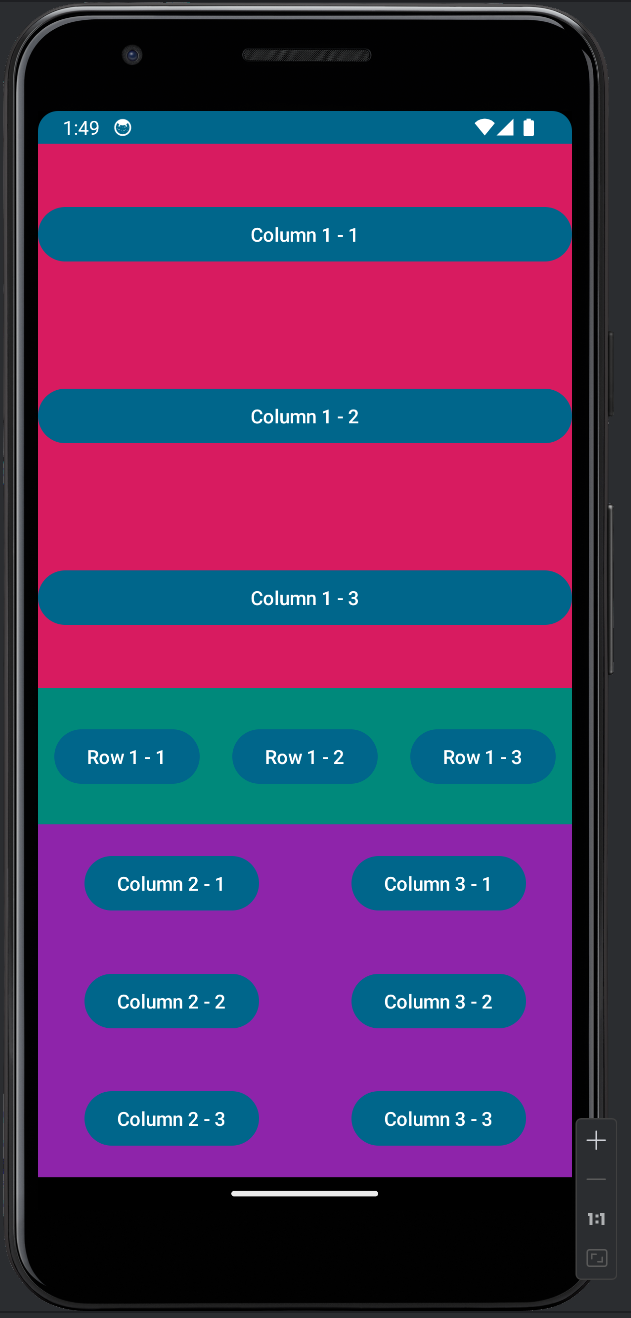

</center>

## Modifier

- O Modifier é uma classe que nos permite modificar os estilos de um composable, como tamanho, cor, posicionamento, espaçamento, dentro outros.

- <i style="color:crimson">As modificações são aplicadas na ordem em que você as declara, por tanto a ordem é importante</i>

- Os modificadores mais utilizados são :

<center>


|Modificadores   | Descrição                                                                                    |
|----------------|----------------------------------------------------------------------------------------------|
|Padding( )      | Adiciona um espaçamento interno ao redor do composable                                       |
|Size()          | Define o tamnaho do composable                                                               |
|Offset()        | Define a posição do composable dentro do seu contêiner pai                                   |
|Clickable()     | Torna o composable clicável e permite adicionar uma ação ao ser clicado                      |
|Background()    | Define a cor de fundo do composable                                                          |
|FillMaxWidth()  | Faz com que o composable ocupe todo o espaço disponível no eixo horizontal                   |
|FillMaxHeight() | Faz com que o composable ocupe todo o espaço disponível no eixo vertical                     |
|FillMaxSize()   | Faz com que o composable todo o espaço disponível na tela                                    |
|Align()         | Alinha o composable dentro do seu conêiner pai                                               |
|Weight()        | Controla a distruição do espaço disponível entre vários composables dentro de um container   |


</center>



.../Parei apos a descrição dos modificadores mais utilzados em 7/12 antes de iniciar a figura "Efeitos visuais"
